- Are houses typically surrounded by similar houses
- Can you predict sqft living from number of bathrooms? 
- Which zipcodes most desirable to our client?


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import random
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #Interquartile range
   fence_low  = q1 - 1.5*iqr
   fence_high = q3 + 1.5*iqr
   df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
   return df_out

In [4]:
price_drop = remove_outlier(df, 'price').index
df.drop(index= price_drop, inplace= True)

sqft_living_drop = remove_outlier(df, 'sqft_living').index
df.drop(index= sqft_living_drop, inplace= True)

sqft_living15_drop = remove_outlier(df, 'sqft_living15').index
df.drop(index= sqft_living15_drop, inplace= True)

sqft_lot_drop = remove_outlier(df, 'sqft_lot').index
df.drop(index= sqft_lot_drop, inplace= True)

sqft_lot15_drop = remove_outlier(df, 'sqft_lot15').index
df.drop(index= sqft_lot15_drop, inplace= True)

In [5]:
df.dropna(subset=['view'], how='all', inplace=True)

In [6]:
df.drop(columns='waterfront', axis=1, inplace= True)

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
data_df = df[(df['grade'] >=8) & (df['condition'] >=4) & (df['bedrooms'] >=2)]

In [10]:
display(data_df.info())
data_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 24 to 21196
Data columns (total 20 columns):
id               1657 non-null int64
date             1657 non-null datetime64[ns]
price            1657 non-null float64
bedrooms         1657 non-null int64
bathrooms        1657 non-null float64
sqft_living      1657 non-null int64
sqft_lot         1657 non-null int64
floors           1657 non-null float64
view             1657 non-null float64
condition        1657 non-null int64
grade            1657 non-null int64
sqft_above       1657 non-null int64
sqft_basement    1657 non-null object
yr_built         1657 non-null int64
yr_renovated     1373 non-null float64
zipcode          1657 non-null int64
lat              1657 non-null float64
long             1657 non-null float64
sqft_living15    1657 non-null int64
sqft_lot15       1657 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(11), object(1)
memory usage: 271.9+ KB


None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.657000e+03,1.657000e+03,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1373.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000
mean,4.848565e+09,6.314750e+05,3.643935,2.263126,2314.448401,8401.205794,1.395896,0.339167,4.222088,8.208811,1830.664454,1961.901629,43.507647,98070.775498,47.572357,-122.235829,2157.593241,8167.887145
std,2.855041e+09,2.160881e+05,0.813504,0.511877,543.656700,3226.314569,0.475735,0.877589,0.415776,0.464794,518.558165,23.605209,291.211495,57.765792,0.121150,0.109779,424.604390,2808.777920
min,3.120002e+07,1.499000e+05,2.000000,1.000000,920.000000,1339.000000,1.000000,0.000000,4.000000,8.000000,700.000000,1900.000000,0.000000,98001.000000,47.189600,-122.446000,950.000000,1062.000000
25%,2.469000e+09,4.640000e+05,3.000000,1.750000,1940.000000,6000.000000,1.000000,0.000000,4.000000,8.000000,1460.000000,1951.000000,0.000000,98023.000000,47.528400,-122.336000,1880.000000,5900.000000
50%,4.206901e+09,6.300000e+05,4.000000,2.250000,2250.000000,8400.000000,1.000000,0.000000,4.000000,8.000000,1730.000000,1967.000000,0.000000,98052.000000,47.588000,-122.222000,2130.000000,8348.000000
75%,7.575601e+09,7.900000e+05,4.000000,2.500000,2650.000000,10297.000000,2.000000,0.000000,4.000000,8.000000,2110.000000,1978.000000,0.000000,98117.000000,47.659500,-122.152000,2430.000000,10090.000000
max,9.839301e+09,1.120000e+06,7.000000,4.500000,3970.000000,17717.000000,3.000000,4.000000,5.000000,11.000000,3950.000000,2009.000000,2014.000000,98199.000000,47.777600,-121.786000,3410.000000,14636.000000


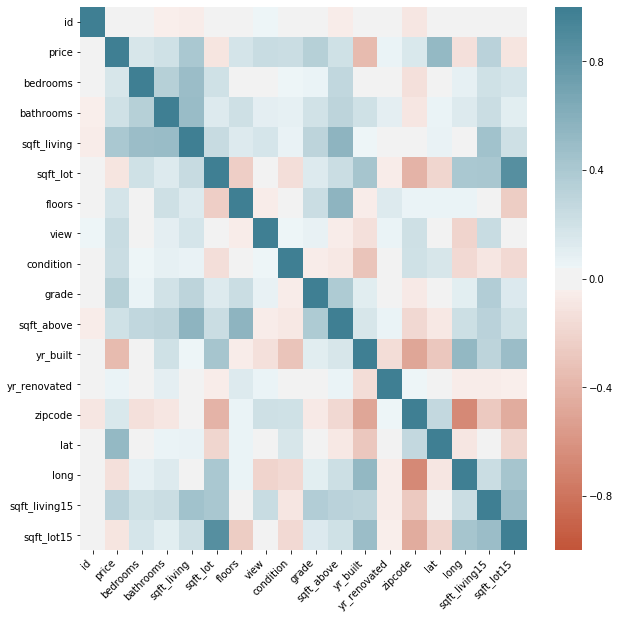

In [11]:
corr = data_df.corr()

plt.figure(figsize = (10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);